In [104]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor)
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


One of the algorithms that is being used outside of class is Random Forest machine learning algorithm. We are also incorporating Bagging ensembler learning which is basically randomly splitting the data set into different versions with different entries selected and from there, the Random Forest is created through the best model of all the occurrences. That way, it will optimize the model to better predict the values. We wanted to use regular Decision Tree Regressors in the beginning; however, Random Forest Regressor was used in the end because Decision Trees tend to get overfitted quite easily so we wanted to apply Bagging to counteract that as well as including a training and testing portion. 

https://medium.com/nerd-for-tech/bootstrap-aggregating-and-random-forest-model-9460e235537
https://www.geeksforgeeks.org/random-forest-regression-in-python/
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html


In [105]:
data = pd.read_csv('Dataset/ICP_Residential_Austin2017up.csv')
# Choosing the columns
data_columns_for_pca = data[["Permit Type Desc", "Permit Class Mapped","Permit Class","Work Class", "Condominium",
'Remodel Repair SQFT', 'Total New Add SQFT','Total Valuation Remodel', 'Number Of Floors', 'Total Job Valuation',
'Total Lot SQFT']]

#Replacing the empty space with NaN and then deleting all the NaN
data_columns_for_pca = data_columns_for_pca.replace(r'^s*$', float('NaN'))
data_columns_for_pca.dropna(inplace = True)

#Selecting the columns that are categorical and converting it into numerical 
cate_columns = data_columns_for_pca.select_dtypes(['object']).columns
data_columns_for_pca[cate_columns] = data_columns_for_pca[cate_columns].apply(lambda x: pd.factorize(x)[0])

data_target = data_columns_for_pca['Total Job Valuation']
data_columns_for_pca.drop(columns='Total Job Valuation', inplace=True)


X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(data_columns_for_pca, data_target, test_size=0.8, train_size=0.2, random_state=None)


In [106]:
rf_regression = RandomForestRegressor(n_estimators= 15, bootstrap=True, max_depth=5)
rf_regression.fit(X_train_dt, y_train_dt)


RandomForestRegressor(max_depth=5, n_estimators=15)

In [107]:
y_rf_max4 = rf_regression.predict(X_test_dt)

[Text(0.6015625, 0.9166666666666666, 'X[5] <= 5036.0\nsquared_error = 26005467774.922\nsamples = 869\nvalue = 60628.754'),
 Text(0.390625, 0.75, 'X[7] <= 91250.0\nsquared_error = 8961869195.123\nsamples = 859\nvalue = 50821.249'),
 Text(0.203125, 0.5833333333333334, 'X[6] <= 939.0\nsquared_error = 7694767746.584\nsamples = 825\nvalue = 44097.036'),
 Text(0.125, 0.4166666666666667, 'X[5] <= 1042.0\nsquared_error = 3892122660.535\nsamples = 708\nvalue = 34087.104'),
 Text(0.0625, 0.25, 'X[6] <= 514.0\nsquared_error = 2614149482.697\nsamples = 561\nvalue = 25983.977'),
 Text(0.03125, 0.08333333333333333, 'squared_error = 2129030736.344\nsamples = 458\nvalue = 20823.409'),
 Text(0.09375, 0.08333333333333333, 'squared_error = 4164820561.167\nsamples = 103\nvalue = 49847.497'),
 Text(0.1875, 0.25, 'X[6] <= 405.5\nsquared_error = 7452475330.337\nsamples = 147\nvalue = 63776.154'),
 Text(0.15625, 0.08333333333333333, 'squared_error = 4887772165.53\nsamples = 117\nvalue = 53894.062'),
 Text(0.2

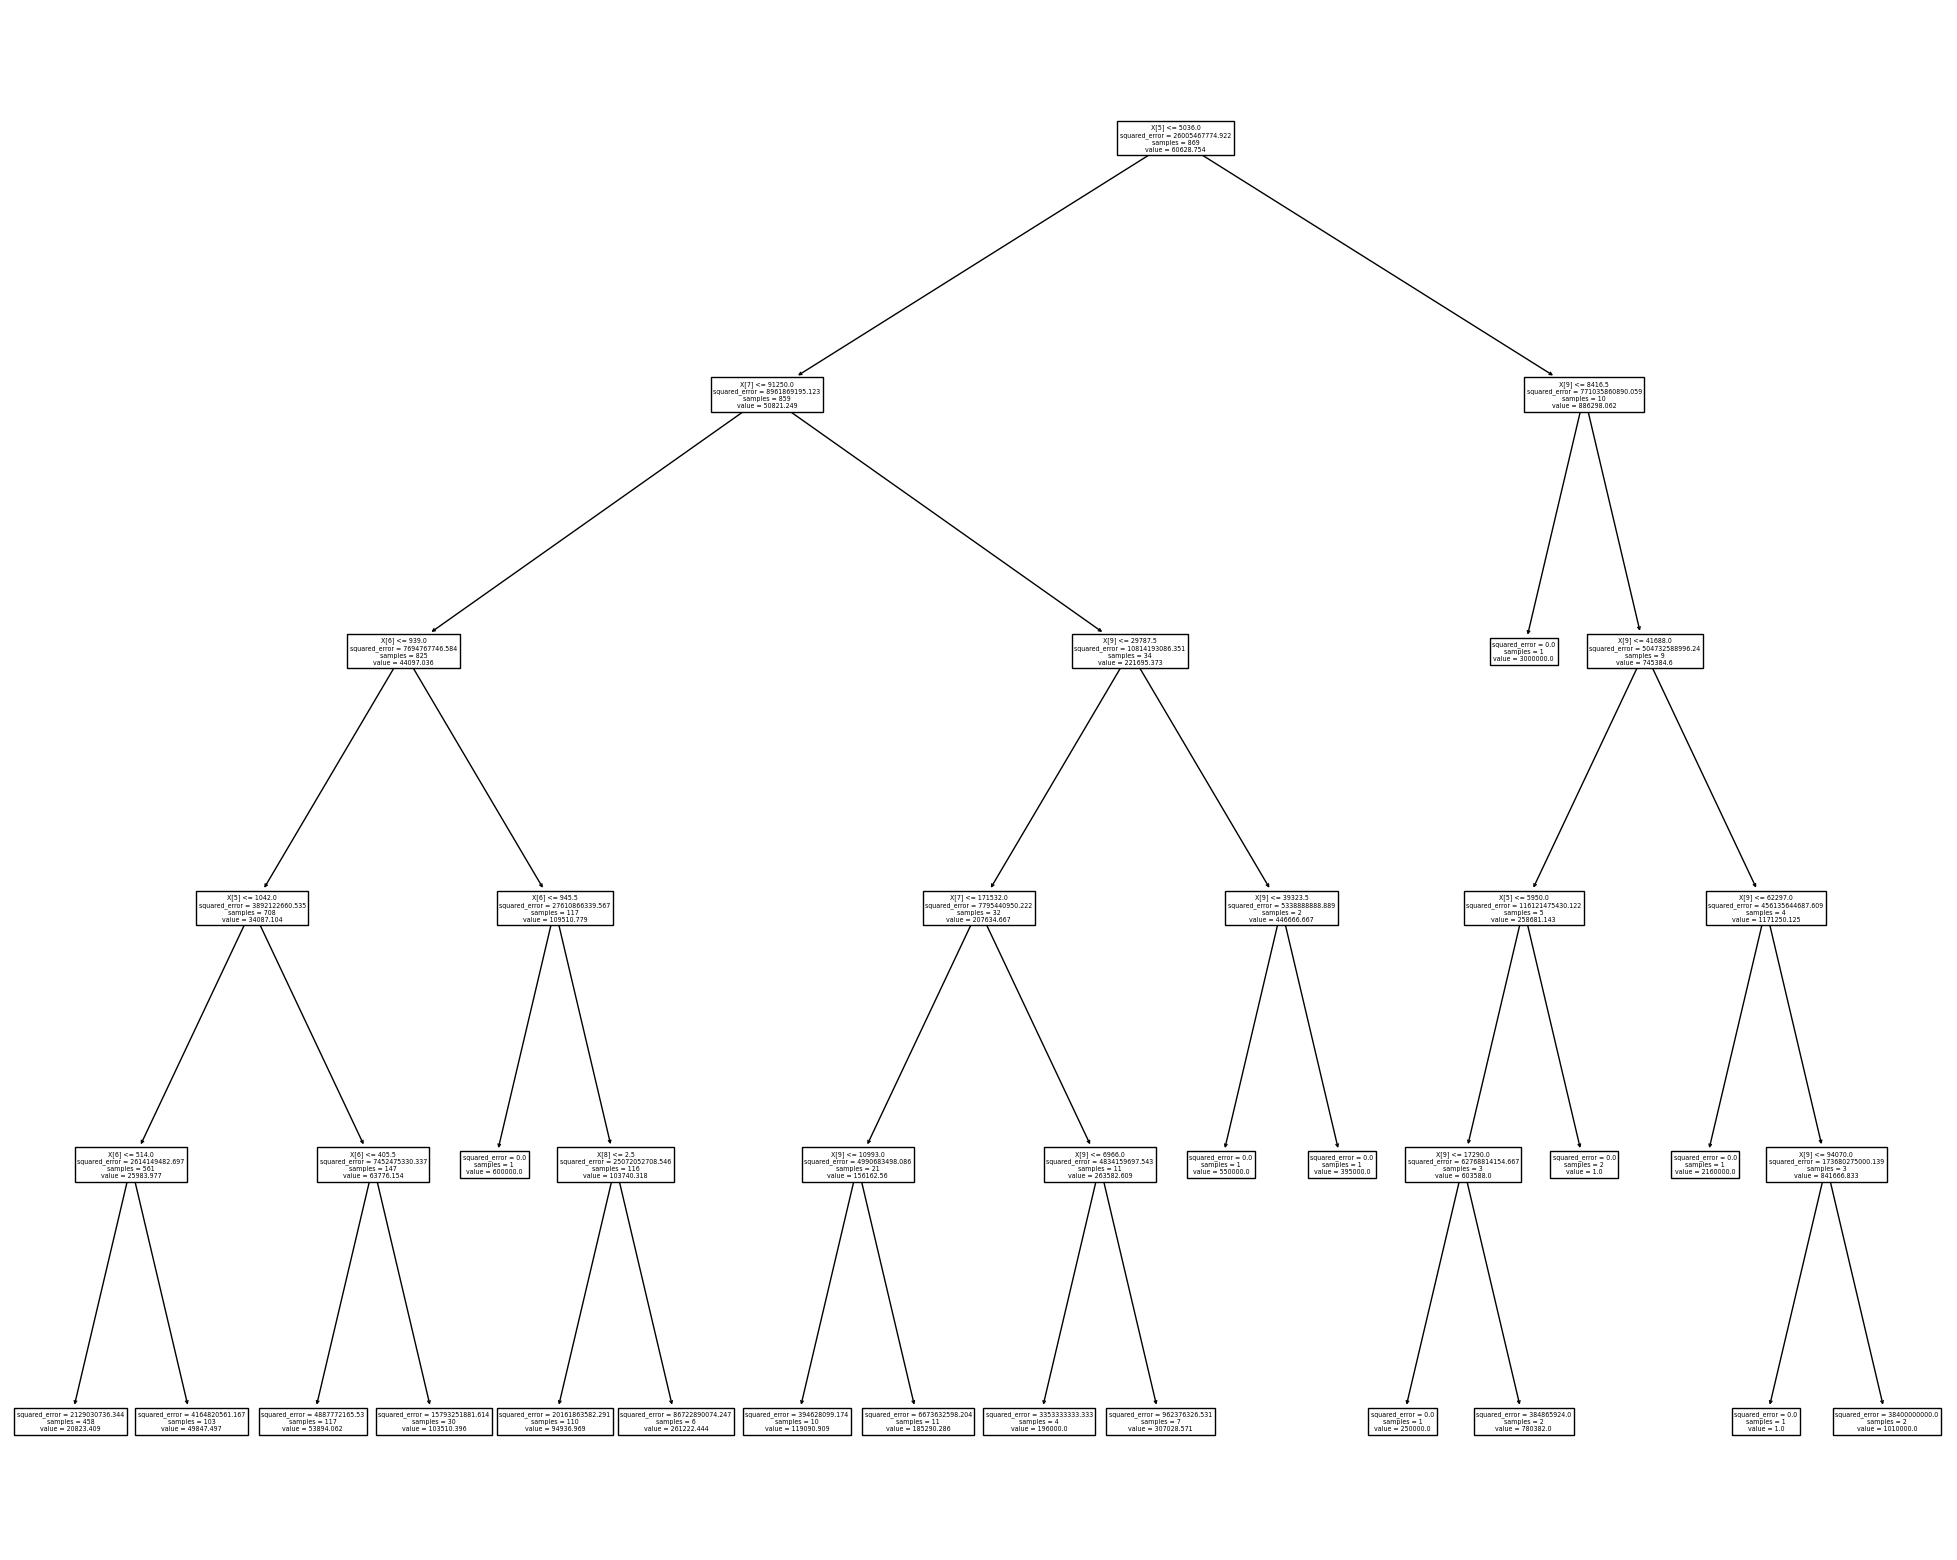

In [108]:
plt.figure(figsize=(25,20))
tree.plot_tree(rf_regression.estimators_[0])

In [109]:
mae_rf = metrics.mean_absolute_error(y_test_dt, y_rf_max4)
mse_rf = metrics.mean_squared_error(y_test_dt, y_rf_max4)
rmse_rf = np.sqrt(mse_rf) # or mse**(0.5)  
r2_rf = metrics.r2_score(y_test_dt,y_rf_max4)

print("Results of sklearn.metrics:")
print("MAE:",mae_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R-Squared:", r2_rf)

Results of sklearn.metrics:
MAE: 59663.00474198501
MSE: 19610184873.39042
RMSE: 140036.36982366553
R-Squared: 0.05560549019102601


[Text(0.5625, 0.9, 'X[5] <= 10438.0\nsquared_error = 24971287926.469\nsamples = 1363\nvalue = 62057.446'),
 Text(0.5, 0.7, 'X[5] <= 5127.5\nsquared_error = 18647592964.291\nsamples = 1362\nvalue = 59900.366'),
 Text(0.25, 0.5, 'X[6] <= 666.5\nsquared_error = 12331490934.361\nsamples = 1349\nvalue = 54672.744'),
 Text(0.125, 0.3, 'X[7] <= 95000.0\nsquared_error = 4416065781.758\nsamples = 1029\nvalue = 34397.977'),
 Text(0.0625, 0.1, 'squared_error = 3703448339.335\nsamples = 1004\nvalue = 30443.444'),
 Text(0.1875, 0.1, 'squared_error = 7184853056.0\nsamples = 25\nvalue = 193212.0'),
 Text(0.375, 0.3, 'X[7] <= 108750.0\nsquared_error = 32212170727.866\nsamples = 320\nvalue = 119868.791'),
 Text(0.3125, 0.1, 'squared_error = 31449629968.001\nsamples = 300\nvalue = 109749.83'),
 Text(0.4375, 0.1, 'squared_error = 19075874734.56\nsamples = 20\nvalue = 271653.2'),
 Text(0.75, 0.5, 'X[9] <= 43613.5\nsquared_error = 376959034072.639\nsamples = 13\nvalue = 602366.769'),
 Text(0.625, 0.3, 'X[8

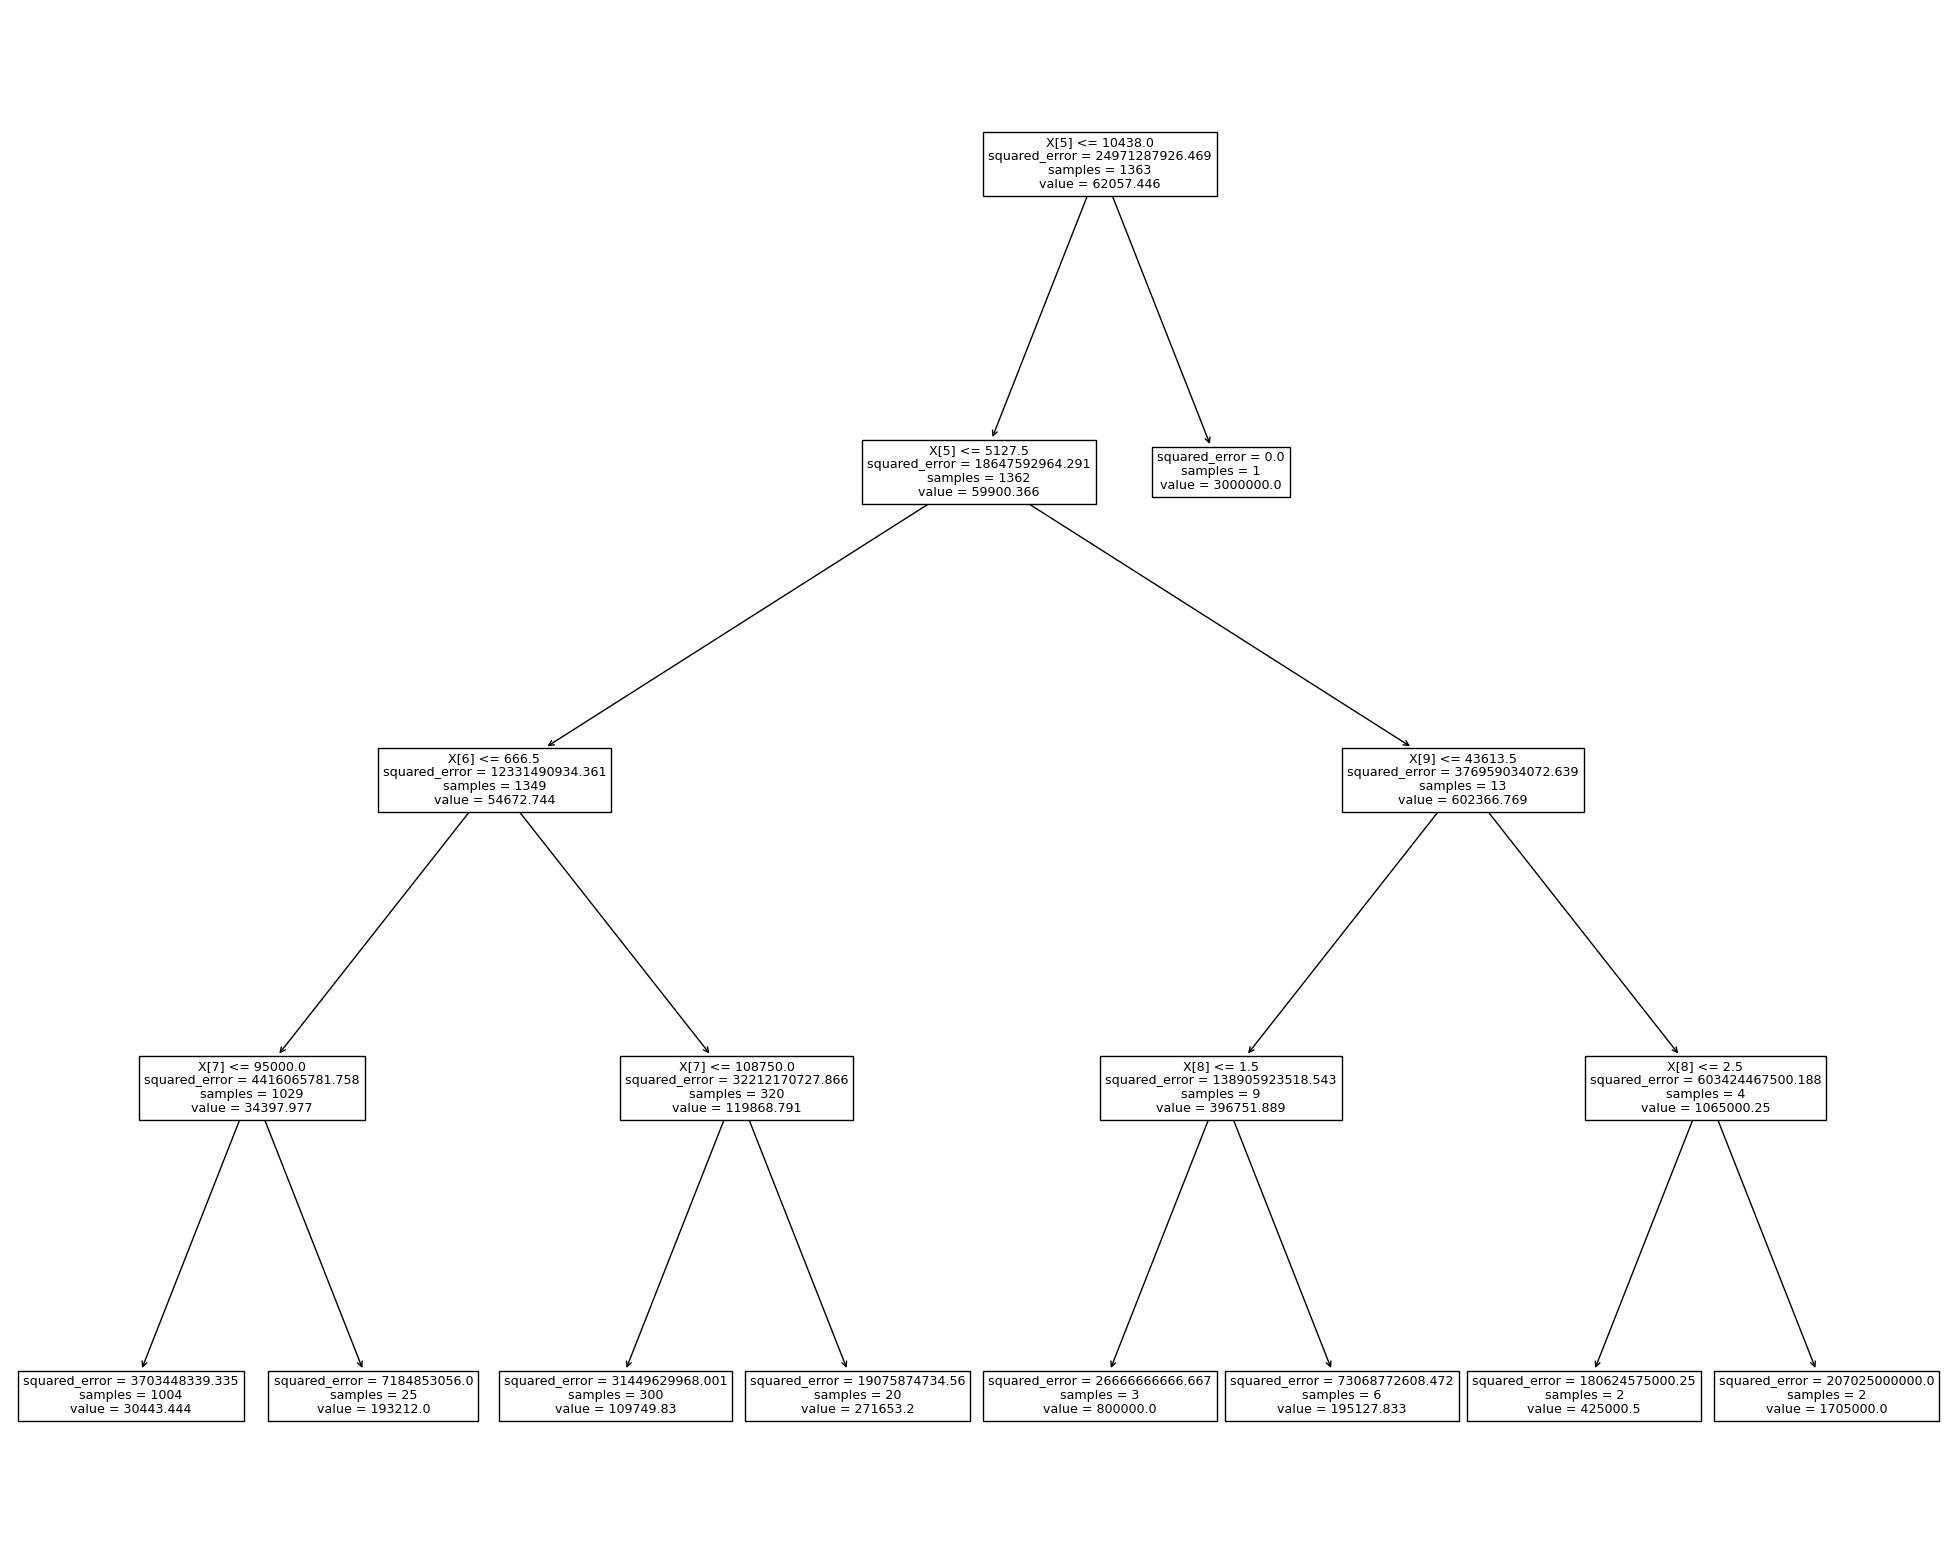

In [110]:
dt_max4 = DecisionTreeRegressor(max_depth=4)
dt_max4.fit(X_train_dt, y_train_dt)

y_dt_max4 = dt_max4.predict(X_test_dt)
plt.figure(figsize=(25,20))
tree.plot_tree(dt_max4)

In [111]:
mae_dt = metrics.mean_absolute_error(y_test_dt, y_dt_max4)
mse_dt = metrics.mean_squared_error(y_test_dt, y_dt_max4)
rmse_dt = np.sqrt(mse_dt) # or mse**(0.5)  
r2_dt = metrics.r2_score(y_test_dt,y_dt_max4)

print("Results of sklearn.metrics:")
print("MAE:",mae_dt)
print("MSE:", mse_dt)
print("RMSE:", rmse_dt)
print("R-Squared:", r2_dt)

Results of sklearn.metrics:
MAE: 64088.25848014833
MSE: 26736564745.259735
RMSE: 163513.1944072396
R-Squared: -0.28758933786685903


Text(0.5, 1.0, 'Feature Importance (MDI)')

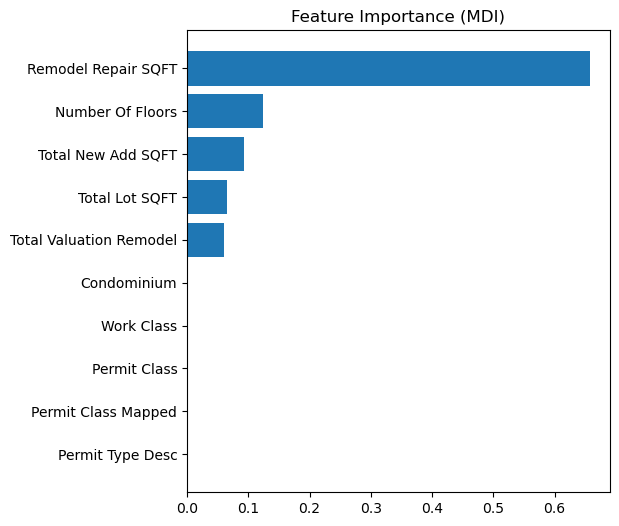

In [135]:
feature_importance = dt_max4.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(data_columns_for_pca.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")
# Could put all of the 3 different feature importances together and have that as a visualization of the model 

In [112]:
gb_max = GradientBoostingRegressor()
gb_max.fit(X_train_dt, y_train_dt)

y_gb_max = gb_max.predict(X_test_dt)
plt.figure(figsize=(25,20))

mae_gb = metrics.mean_absolute_error(y_test_dt, y_gb_max)
mse_gb = metrics.mean_squared_error(y_test_dt, y_gb_max)
rmse_gb = np.sqrt(mse_gb) # or mse**(0.5)  
r2_gb = metrics.r2_score(y_test_dt,y_gb_max)

print("Results of sklearn.metrics:")
print("MAE:",mae_gb)
print("MSE:", mse_gb)
print("RMSE:", rmse_gb)
print("R-Squared:", r2_gb)

Results of sklearn.metrics:
MAE: 58971.477222468005
MSE: 21564808188.500237
RMSE: 146849.6107877043
R-Squared: -0.038525979728929904


<Figure size 2500x2000 with 0 Axes>

Text(0.5, 1.0, 'Feature Importance (MDI)')

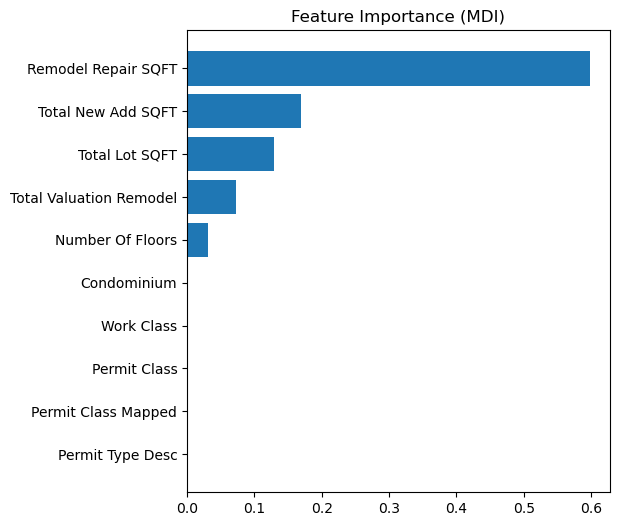

In [113]:
feature_importance = gb_max.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(data_columns_for_pca.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

# This figure is representing the features of importance to the 

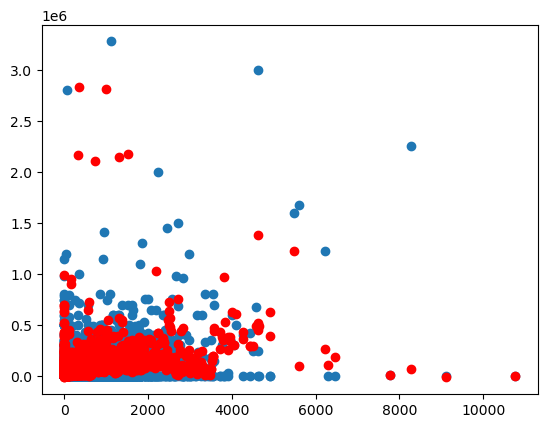

In [114]:
plt.scatter(X_test_dt.loc[:,"Total New Add SQFT"], y_test_dt)
plt.scatter(X_test_dt.loc[:,"Total New Add SQFT"], y_gb_max, color="red")

# This is representing the different scatter plots of models. The gradient boosting model which has overall better metrics compared to random forest or decision tree, was demonstrated using
# The most significant feature that was used to train it which was Total New Add SQFT. Accordingly to the RMSE, MSE, and the R2 values, the model isn't a good fit or that this data set
# can not be represented properly using the gradient boosting model. 

([<matplotlib.axis.XTick at 0x1a3bfb5e8c8>,
 [Text(0, 0, 'Random Forest'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Gradient Boosting')])

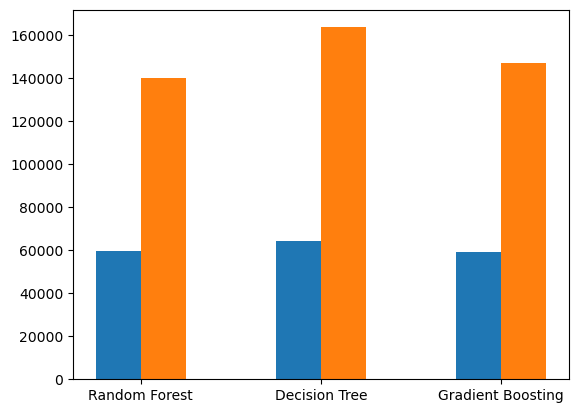

In [134]:
mae_comparison = [mae_rf, mae_dt, mae_gb]
mse_comparison = [mse_rf, mse_dt, mse_gb]
rmse_comparison = [rmse_rf, rmse_dt, rmse_gb]
r2_comparison = [r2_rf, r2_dt, r2_gb]

width = 0.25

labels = ["Random Forest", "Decision Tree", "Gradient Boosting"]
x_labels = np.arange(len(labels))

plt.bar(x_labels - 0.125, mae_comparison, width=width)
plt.bar(x_labels + 0.125, rmse_comparison, width=width)

plt.xticks(x_labels, labels)


# Notation here: the MSE values are wayyyyy tooo high! Unable to portray it on the same graph!
# Need to double check the R2 values and the data that is being used for the models because it seem to be that they aren't being done properly